In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import matplotlib.style as style
%matplotlib inline
style.use('ggplot')

import warnings
warnings.simplefilter("ignore")

pd.pandas.set_option('display.max_columns',None)

In [7]:
df = pd.read_csv('classification_dataset.csv')
df.head()

,density_per_km,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,year,month,Target
0,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,0.0,1018,24,10,189,10,2016,3,1
1,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,0.0,1018,24,10,189,10,2016,3,0
2,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,0.0,1018,24,10,189,10,2016,3,1
3,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,0.0,1018,24,10,189,10,2016,3,0
4,12625.800781,-34.603684,-58.381559,22,10,0.0,11.5,5,76,10,14,16,14,27,34,72,0.0,1025,22,10,99,18,2016,3,0


In [8]:
df.shape

(155223, 25)

In [9]:
df.Target.value_counts()

0    89843
1    65380
Name: Target, dtype: int64

In [10]:
# Total no of duplicate rows
df.duplicated().sum()

79877

In [11]:
# Remove duplicate rows
df = df.drop_duplicates(keep='first', inplace=False)

In [12]:
df.shape

(75346, 25)

In [13]:
df.Target.value_counts()

0    40734
1    34612
Name: Target, dtype: int64

In [14]:
df.columns

Index(['density_per_km', 'latitude', 'longitude', 'maxtempC', 'mintempC',
       'totalSnow_cm', 'sunHour', 'uvIndex', 'moon_illumination', 'DewPointC',
       'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover',
       'humidity', 'precipMM', 'pressure', 'tempC', 'visibility',
       'winddirDegree', 'windspeedKmph', 'year', 'month', 'Target'],
      dtype='object')

## Feature Scaling 

In [15]:
feature_scale = [feature for feature in df.columns if feature in ['density_per_km','precipMM']]

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

MinMaxScaler()

In [19]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([df[['Target','latitude', 'longitude', 'maxtempC', 'mintempC',
       'totalSnow_cm', 'sunHour', 'uvIndex', 'moon_illumination', 'DewPointC',
       'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover',
       'humidity', 'pressure', 'tempC', 'visibility',
       'winddirDegree', 'windspeedKmph', 'year', 'month']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],axis=1)

In [20]:
data.head()

,Target,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,pressure,tempC,visibility,winddirDegree,windspeedKmph,year,month,density_per_km,precipMM
0,1,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,1018,24,10,189,10,2016,3,0.505636,0.000000
1,0,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,1018,24,10,189,10,2016,3,0.505636,0.000000
2,0,-34.603684,-58.381559,22,10,0.0,11.5,5,76,10,14,16,14,27,34,72,1025,22,10,99,18,2016,3,0.505636,0.000000
3,1,-34.603684,-58.381559,22,10,0.0,11.5,5,76,10,14,16,14,27,34,72,1025,22,10,99,18,2016,3,0.505636,0.000000
4,0,-34.603684,-58.381559,22,18,0.0,8.6,4,26,15,19,20,19,17,61,78,1015,22,8,105,11,2016,4,0.505636,0.097011


In [21]:
X = data.iloc[:,1:]  #independent columns
y = data['Target'] #dependent column

## 1. ExtraTreesClassifier

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [28]:
model.feature_importances_

array([0.13382998, 0.14805329, 0.03015149, 0.03693139, 0.00048468,
       0.02898026, 0.02152372, 0.02487591, 0.03788563, 0.02986766,
       0.03338505, 0.02911458, 0.0273519 , 0.0289908 , 0.03128379,
       0.02762196, 0.02751105, 0.01816366, 0.03253689, 0.02751806,
       0.03858376, 0.04767245, 0.11360022, 0.0240818 ])

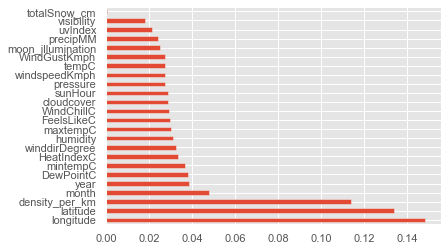

In [35]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(24).plot(kind='barh')
plt.show()

In [38]:
print(feat_importances.nlargest(24))

longitude            0.148053
latitude             0.133830
density_per_km       0.113600
month                0.047672
year                 0.038584
DewPointC            0.037886
mintempC             0.036931
HeatIndexC           0.033385
winddirDegree        0.032537
humidity             0.031284
maxtempC             0.030151
FeelsLikeC           0.029868
WindChillC           0.029115
cloudcover           0.028991
sunHour              0.028980
pressure             0.027622
windspeedKmph        0.027518
tempC                0.027511
WindGustKmph         0.027352
moon_illumination    0.024876
precipMM             0.024082
uvIndex              0.021524
visibility           0.018164
totalSnow_cm         0.000485
dtype: float64


## 2. Infromation gain

In [42]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X,y)

In [43]:
mutual_data = pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

latitude             0.102152
longitude            0.101001
density_per_km       0.100218
DewPointC            0.014741
HeatIndexC           0.012366
mintempC             0.010714
uvIndex              0.010249
FeelsLikeC           0.009778
maxtempC             0.009214
year                 0.008793
WindChillC           0.008685
tempC                0.006772
sunHour              0.006116
moon_illumination    0.005568
visibility           0.004853
month                0.004231
precipMM             0.002809
cloudcover           0.002336
humidity             0.001881
winddirDegree        0.001771
pressure             0.000526
totalSnow_cm         0.000196
windspeedKmph        0.000000
WindGustKmph         0.000000
dtype: float64

<AxesSubplot:>

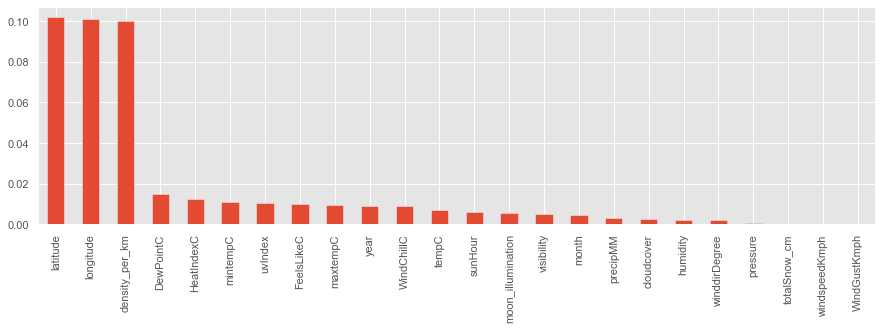

In [44]:
mutual_data.sort_values(ascending=False).plot.bar(figsize=(15,4))

In [46]:
select_col = SelectKBest(mutual_info_classif,k=20)
select_col.fit(X,y)
X.columns[select_col.get_support()]

Index(['latitude', 'longitude', 'maxtempC', 'mintempC', 'sunHour', 'uvIndex',
       'moon_illumination', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'cloudcover', 'humidity', 'pressure', 'tempC',
       'visibility', 'winddirDegree', 'year', 'month', 'density_per_km'],
      dtype='object')

## 3. XGBoost

[11:16:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.12249829 0.10448384 0.02573625 0.03464723 0.         0.01265276
 0.00977605 0.02592792 0.15543634 0.03859988 0.04747077 0.11372995
 0.01676717 0.01423195 0.02122833 0.01762823 0.         0.01091673
 0.01735139 0.01856353 0.06418895 0.04718906 0.06722211 0.01375327]


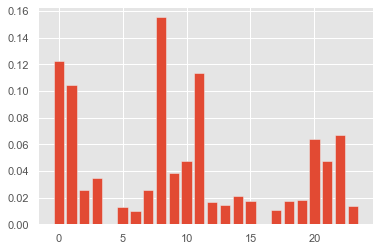

In [54]:
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot

# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# feature importance
print(model.feature_importances_)
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [55]:
feat_importance = pd.Series(model.feature_importances_,index=X.columns)
feat_importance.sort_values(ascending=False)

DewPointC            0.155436
latitude             0.122498
WindChillC           0.113730
longitude            0.104484
density_per_km       0.067222
year                 0.064189
HeatIndexC           0.047471
month                0.047189
FeelsLikeC           0.038600
mintempC             0.034647
moon_illumination    0.025928
maxtempC             0.025736
humidity             0.021228
windspeedKmph        0.018564
pressure             0.017628
winddirDegree        0.017351
WindGustKmph         0.016767
cloudcover           0.014232
precipMM             0.013753
sunHour              0.012653
visibility           0.010917
uvIndex              0.009776
tempC                0.000000
totalSnow_cm         0.000000
dtype: float32

<AxesSubplot:>

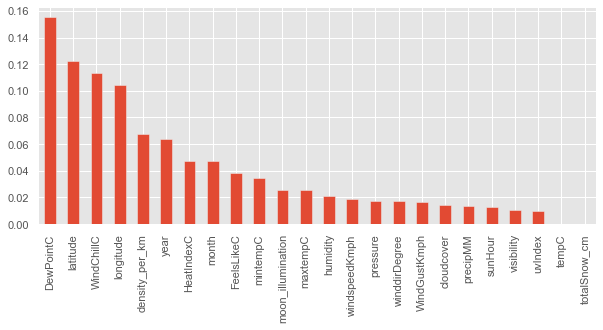

In [56]:
feat_importance = pd.Series(model.feature_importances_,index=X.columns)
feat_importance.sort_values(ascending=False)
feat_importance.sort_values(ascending=False).plot.bar(figsize=(10,4))

In [50]:
len(df.columns)

25